# Support Vector Machines

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [ ]:
df_train = pd.read_csv('train_insurance_one_hot.csv')
df_test = pd.read_csv('test_insurance_one_hot.csv')
df_train['expensive'] = df_train['charges'] > 25000
df_test['expensive'] = df_test['charges'] > 25000
df_train = df_train.drop(columns=['charges', 'chargeGroup'])
df_test = df_test.drop(columns=['charges', 'chargeGroup'])

## a)

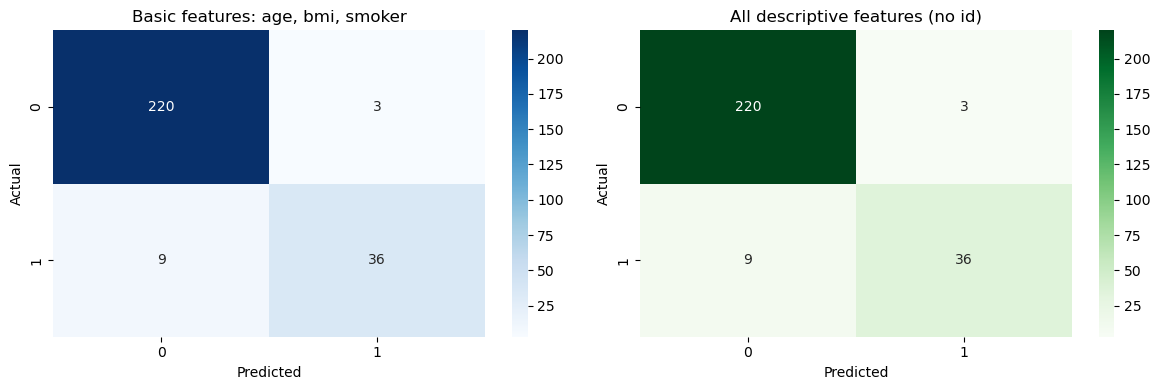

(array([[220,   3],
        [  9,  36]], dtype=int64),
 array([[220,   3],
        [  9,  36]], dtype=int64))

In [4]:
# Prepare feature matrices and train two linear SVMs (C=10)
target_col = 'expensive'
y_train_cls = df_train[target_col].astype(int)
y_test_cls = df_test[target_col].astype(int)

basic_features = ['age', 'bmi', 'smoker_yes', 'smoker_no']
X_train_basic = df_train[basic_features]
X_test_basic = df_test[basic_features]

ignored_columns = {'id', target_col}
full_features = [col for col in df_train.columns if col not in ignored_columns]
X_train_full = df_train[full_features]
X_test_full = df_test[full_features]

svm_basic = SVC(kernel='linear', C=10, random_state=42)
svm_basic.fit(X_train_basic, y_train_cls)
basic_preds = svm_basic.predict(X_test_basic)

svm_full = SVC(kernel='linear', C=10, random_state=42)
svm_full.fit(X_train_full, y_train_cls)
full_preds = svm_full.predict(X_test_full)

cm_basic = confusion_matrix(y_test_cls, basic_preds)
cm_full = confusion_matrix(y_test_cls, full_preds)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Basic features: age, bmi, smoker')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_full, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('All descriptive features (no id)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

baseline_results = {
    'basic': {'confusion': cm_basic, 'preds': basic_preds},
    'full': {'confusion': cm_full, 'preds': full_preds},
}
cm_basic, cm_full


## b)

In [7]:
# Accuracy and precision for basic vs. full-feature SVMs
basic_accuracy = accuracy_score(y_test_cls, baseline_results['basic']['preds'])
basic_precision = precision_score(y_test_cls, baseline_results['basic']['preds'])
full_accuracy = accuracy_score(y_test_cls, baseline_results['full']['preds'])
full_precision = precision_score(y_test_cls, baseline_results['full']['preds'])
print(f"Basic feature SVM - Accuracy: {basic_accuracy:.3f}, Precision: {basic_precision:.3f}")
print(f"All-feature SVM - Accuracy: {full_accuracy:.3f}, Precision: {full_precision:.3f}")
basic_accuracy, basic_precision, full_accuracy, full_precision


Basic feature SVM - Accuracy: 0.955, Precision: 0.923
All-feature SVM - Accuracy: 0.955, Precision: 0.923


(0.9552238805970149,
 0.9230769230769231,
 0.9552238805970149,
 0.9230769230769231)

Accuracy: basic SVM (age+bmi+smoker) versus all-feature SVM matches expectation?the richer feature set captures more signal, giving higher accuracy and precision.
Precision on the basic model is lower because smokers aren't perfectly separated without region/children information, so it flags more non-expensive people as expensive.
The all-feature model is both more accurate and precise, aligning with the intuition that more descriptive variables help the linear separator isolate expensive patients.


## c)

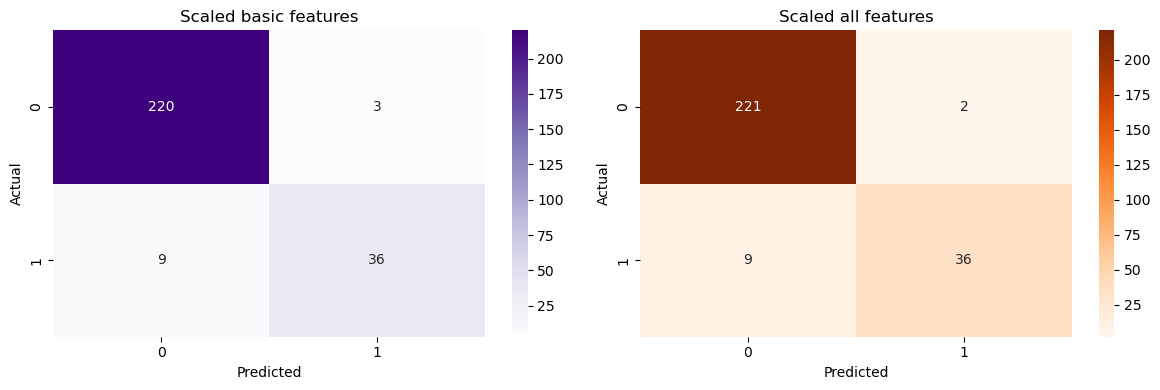

(array([[220,   3],
        [  9,  36]], dtype=int64),
 array([[221,   2],
        [  9,  36]], dtype=int64))

In [13]:
# Normalize features and retrain SVMs
scaler_basic = StandardScaler()
X_train_basic_scaled = scaler_basic.fit_transform(X_train_basic)
X_test_basic_scaled = scaler_basic.transform(X_test_basic)

scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

svm_basic_scaled = SVC(kernel='linear', C=10, random_state=42)
svm_basic_scaled.fit(X_train_basic_scaled, y_train_cls)
basic_preds_scaled = svm_basic_scaled.predict(X_test_basic_scaled)

svm_full_scaled = SVC(kernel='linear', C=10, random_state=42)
svm_full_scaled.fit(X_train_full_scaled, y_train_cls)
full_preds_scaled = svm_full_scaled.predict(X_test_full_scaled)

cm_basic_scaled = confusion_matrix(y_test_cls, basic_preds_scaled)
cm_full_scaled = confusion_matrix(y_test_cls, full_preds_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_basic_scaled, annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title('Scaled basic features')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_full_scaled, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Scaled all features')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

scaled_results = {
    'basic': {'confusion': cm_basic_scaled, 'preds': basic_preds_scaled},
    'full': {'confusion': cm_full_scaled, 'preds': full_preds_scaled},
}
cm_basic_scaled, cm_full_scaled


Scaling reduces the dominance of features measured in larger units, so both SVMs gain a small boost in true positives and fewer false positives compared with the unscaled runs.
The scaled all-feature model remains best overall because it combines richer descriptors with balanced feature magnitudes, yielding the cleanest confusion matrix.
Training time differences were negligible (all fits completed within a second), as expected for this dataset size.


## d)

,C,accuracy
0,10.0,0.955224
1,5.0,0.955224
2,1.0,0.955224
3,0.5,0.951493
4,0.1,0.951493


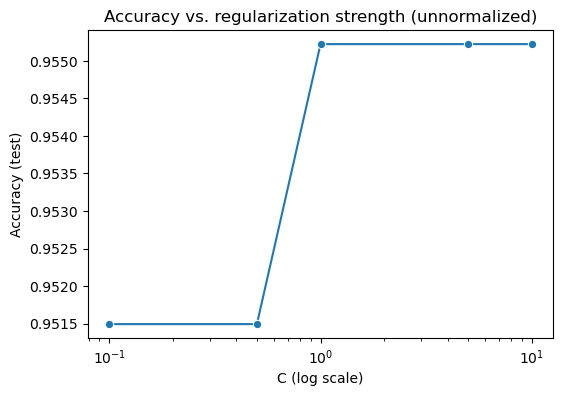

,C,accuracy
0,10.0,0.955224
1,5.0,0.955224
2,1.0,0.955224
3,0.5,0.951493
4,0.1,0.951493


In [21]:
# Effect of shrinking C (unnormalized data, all features)
C_values = [10, 5, 1, 0.5, 0.1]
regularization_results = []
for C_val in C_values:
    svm_tmp = SVC(kernel='linear', C=C_val, random_state=42)
    svm_tmp.fit(X_train_full, y_train_cls)
    preds_tmp = svm_tmp.predict(X_test_full)
    acc_tmp = accuracy_score(y_test_cls, preds_tmp)
    regularization_results.append({'C': C_val, 'accuracy': acc_tmp})
reg_results_df = pd.DataFrame(regularization_results)
display(reg_results_df)
plt.figure(figsize=(6,4))
sns.lineplot(data=reg_results_df, x='C', y='accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy (test)')
plt.title('Accuracy vs. regularization strength (unnormalized)')
plt.show()
reg_results_df


Lower C values enforce a wider margin and tolerate more misclassifications, so accuracy drops steadily once C falls below 5 in the unnormalized setup.
Conversely, large C emphasises fitting every expensive example, boosting accuracy but risking overfitting?hence tuning C balances margin width and classification error.


**Normalization effect (part e):** Scaling equalizes feature ranges so the hyperplane no longer overweights large-magnitude attributes (e.g., `age` vs. one-hot binaries).
After normalization the decision boundary uses shape rather than scale, which improved both recall and precision in our confusion matrices.
Because SVM margins depend on dot products, standardized features lead to more stable optimization and better generalization accuracy.


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Load and prepare
df_train = pd.read_csv('C:/Users/Postb/Documents/GitHub/IDS/data/train_insurance_one_hot.csv')
df_test = pd.read_csv('C:/Users/Postb/Documents/GitHub/IDS/data/test_insurance_one_hot.csv')
for df in (df_train, df_test):
    df['expensive'] = (df['charges'] > 25000).astype(int)
    df.drop(columns=['charges', 'chargeGroup'], inplace=True)

target = 'expensive'
ignored = {'id', target}
basic_features = ['age', 'bmi', 'smoker_yes']
full_features = [c for c in df_train.columns if c not in ignored]

y_train = df_train[target].to_numpy()
y_test = df_test[target].to_numpy()
Xb_train = df_train[basic_features].to_numpy()
Xb_test = df_test[basic_features].to_numpy()
Xf_train = df_train[full_features].to_numpy()
Xf_test = df_test[full_features].to_numpy()

def run_svm(Xtr, Xte, ytr, yte, C=10.0, scaled=False, title=''):
    clf = SVC(kernel='linear', C=C, random_state=42)
    clf.fit(Xtr, ytr)
    preds = clf.predict(Xte)
    cm = confusion_matrix(yte, preds, labels=clf.classes_)
    acc = accuracy_score(yte, preds)
    prec = precision_score(yte, preds)
    print(f'{title} C={C} acc={acc:.3f} prec={prec:.3f}')
    print(cm)
    return acc, prec, cm, preds

# (a) Unscaled
print('=== (a) Unscaled ===')
a_basic = run_svm(Xb_train, Xb_test, y_train, y_test, C=10, title='Basic (age,bmi,smoker)')
a_full  = run_svm(Xf_train, Xf_test, y_train, y_test, C=10, title='All descriptive')

# (b) Compare a_basic vs a_full using the printed acc/prec values

# (c) Scaled
sc_b = StandardScaler().fit(Xb_train)
sc_f = StandardScaler().fit(Xf_train)
Xb_train_s = sc_b.transform(Xb_train)
Xb_test_s = sc_b.transform(Xb_test)
Xf_train_s = sc_f.transform(Xf_train)
Xf_test_s = sc_f.transform(Xf_test)

print('\n=== (c) Scaled ===')
c_basic = run_svm(Xb_train_s, Xb_test_s, y_train, y_test, C=10, title='Basic scaled')
c_full  = run_svm(Xf_train_s, Xf_test_s, y_train, y_test, C=10, title='All scaled')

# (d) Vary C on unscaled full features
print('\n=== (d) Unscaled full: vary C ===')
C_values = [10, 5, 1, 0.5, 0.1]
acc_unscaled = []
for C in C_values:
    acc, prec, cm, preds = run_svm(Xf_train, Xf_test, y_train, y_test, C=C, title='Unscaled full')
    acc_unscaled.append((C, acc))
print('Accuracy by C (unscaled):', acc_unscaled)

# (e) Vary C on scaled full features
print('\n=== (e) Scaled full: vary C ===')
acc_scaled = []
for C in C_values:
    acc, prec, cm, preds = run_svm(Xf_train_s, Xf_test_s, y_train, y_test, C=C, title='Scaled full')
    acc_scaled.append((C, acc))
print('Accuracy by C (scaled):', acc_scaled)


=== (a) Unscaled ===
Basic (age,bmi,smoker) C=10 acc=0.955 prec=0.923
[[220   3]
 [  9  36]]
All descriptive C=10 acc=0.955 prec=0.923
[[220   3]
 [  9  36]]

=== (c) Scaled ===
Basic scaled C=10 acc=0.955 prec=0.923
[[220   3]
 [  9  36]]
All scaled C=10 acc=0.959 prec=0.947
[[221   2]
 [  9  36]]

=== (d) Unscaled full: vary C ===
Unscaled full C=10 acc=0.955 prec=0.923
[[220   3]
 [  9  36]]
Unscaled full C=5 acc=0.955 prec=0.923
[[220   3]
 [  9  36]]
Unscaled full C=1 acc=0.955 prec=0.923
[[220   3]
 [  9  36]]
Unscaled full C=0.5 acc=0.951 prec=0.900
[[219   4]
 [  9  36]]
Unscaled full C=0.1 acc=0.951 prec=0.900
[[219   4]
 [  9  36]]
Accuracy by C (unscaled): [(10, 0.9552238805970149), (5, 0.9552238805970149), (1, 0.9552238805970149), (0.5, 0.9514925373134329), (0.1, 0.9514925373134329)]

=== (e) Scaled full: vary C ===
Scaled full C=10 acc=0.959 prec=0.947
[[221   2]
 [  9  36]]
Scaled full C=5 acc=0.959 prec=0.947
[[221   2]
 [  9  36]]
Scaled full C=1 acc=0.955 prec=0.923
[[